In [ ]:
!pip install underthesea

     |████████████████████████████████| 7.5MB 7.0MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 753.2MB 16kB/s 
     |████████████████████████████████| 747kB 50.1MB/s 
     |████████████████████████████████| 245kB 57.0MB/s 
     |████████████████████████████████| 1.3MB 47.5MB/s 
     |████████████████████████████████| 1.1MB 56.5MB/s 
     |████████████████████████████████| 890kB 52.4MB/s 
     |████████████████████████████████| 2.9MB 55.0MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp36-none-any.whl size=16171 sha256=14473b3b4ebceb85c1bc3cfe2ce77a882ceafb5eaad062f9b51c828069fb292e
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=3a0cb7ed9337ca608cd31e91352b3f8030cc4b7c9aa3ee821301aee2ca240b0a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import random
from sklearn.metrics import confusion_matrix
import string

In [ ]:
dataset = []
with open("news_small.jsonl", encoding="utf-8") as f:
    for line in f:
        data = json.loads(line)
        dataset.append(data)

In [ ]:
dataset[0]

{'category': 'Thời sự',
 'content': ['Ngày đầu đi làm sau kỳ nghỉ Tết Nguyên đán nhiều khả năng sẽ có mưa, trời rét - Ảnh: TẤN LỰC',
  'Theo Trung tâm dự báo khí tượng thủy văn quốc gia, hiện nay (16-2),\xa0bộ phận không khí lạnh đã báo tiếp tục di chuyển xuống phía Nam.',
  'Dự báo khoảng chiều tối và đêm nay, bộ phận không khí lạnh này sẽ ảnh hưởng đến các tỉnh vùng núi Bắc Bộ, ngày mai 17-2 ảnh hưởng đến các nơi khác ở Bắc Bộ và Bắc Trung Bộ, sau đó ảnh hưởng một số nơi ở Trung Trung Bộ.',
  'Do ảnh hưởng của không khí lạnh, từ chiều tối và đêm nay, ở các tỉnh Bắc Bộ và Thanh Hóa có mưa, mưa nhỏ rải rác.',
  'Từ gần sáng ngày mai, ở Bắc và Trung Trung Bộ có mưa, mưa rào rải rác.\xa0',
  'Từ ngày mai 17-2, ở Bắc Bộ trời chuyển rét với nhiệt độ thấp nhất phổ biến 14-17 độ, vùng núi có nơi dưới 13 độ. Ở các tỉnh Bắc Trung Bộ trời rét với nhiệt độ thấp nhất khoảng 15-18 độ.',
  'Từ đêm nay, gió chuyển hướng đông bắc trong đất liền cấp 2-3, vùng ven biển cấp 3-4. Ở Vịnh Bắc Bộ và vùng bi

In [ ]:
stopwords = []
with open("stopwords.txt") as f:
    for line in f:
        stopwords.append(line.replace("\n", ""))
stopwords[:10]

['a lô',
 'a ha',
 'ai',
 'ai ai',
 'ai nấy',
 'ai đó',
 'alô',
 'amen',
 'anh',
 'anh ấy']

In [ ]:
def filtering(token, stopwords=[]):
    if token in string.punctuation and not token in stopwords:
        return False
    return True

def standardization(token):
    if token.isdigit():
        return "<num>"
    lowercase = token.lower()
    return re.sub("[%s]" % re.escape(string.punctuation), "", lowercase)

In [ ]:
from underthesea import word_tokenize, sent_tokenize

In [ ]:
data_tokenized = []
for data in dataset:
    text = " ".join(data["content"])
    tokens = word_tokenize(text)
    data_tokenized.append([standardization(token) for token in tokens if filtering(token)])

## Distribution of articles length

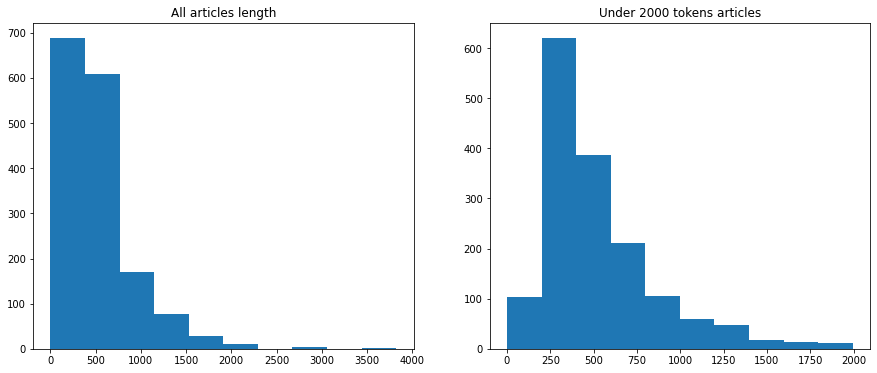

In [ ]:
lengths = np.array([len(data) for data in data_tokenized])
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("All articles length")
plt.hist(lengths)
plt.subplot(1, 2, 2)
plt.title("Under 2000 tokens articles")
plt.hist(lengths[lengths < 2000]);

## Number of articles / category

In [ ]:
len(dataset)

1585

In [ ]:
categories = set([data["category"] for data in dataset])
categories

{'Bạn đọc',
 'Công nghệ',
 'Du lịch',
 'Giáo dục',
 'Giả-thật',
 'Giải trí',
 'Khoa học',
 'Kinh doanh',
 'Nhịp sống trẻ',
 'Pháp luật',
 'Sức khỏe',
 'Thế giới',
 'Thể thao',
 'Thời sự',
 'Văn hóa',
 'Xe'}

In [ ]:
num_articles = {}
for c in categories:
    num_articles[c] = 0

for data in dataset:
    num_articles[data["category"]] += 1

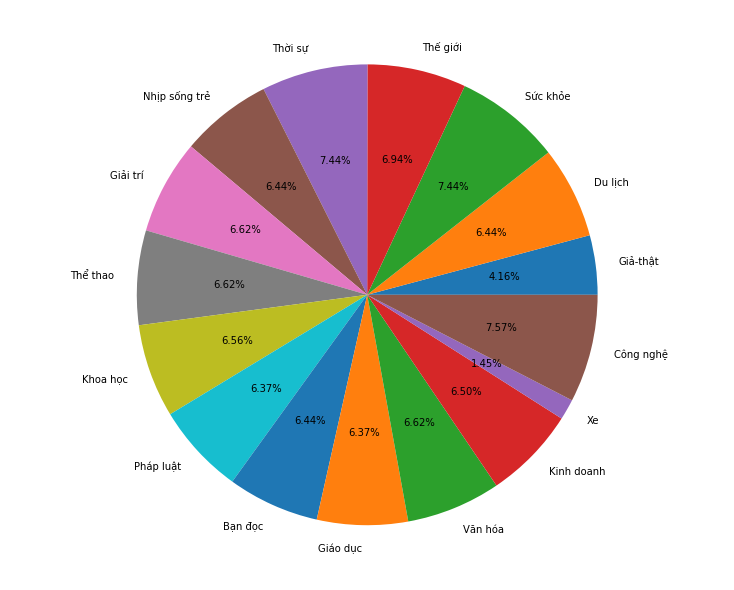

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

cats = list(categories)
nums = [num_articles[c] for c in cats]

ax.pie(nums, labels = cats, autopct='%1.2f%%')
plt.show()

## BAG OF WORDS APPROACH

In [ ]:
#filtering out punctuations and numbers
filter = re.compile(r"[!@#$%^&*)(.,/\\\"-:;?]|[0-9]+")
#number of word in vocab
n_feats = 2000

In [ ]:
all_vocabs = [token for text in data_tokenized for token in text if not filter.match(token)]
token_counts = Counter(all_vocabs)
sort_by_freq = sorted(token_counts, key=lambda x : token_counts[x], reverse=True)
vocab = sort_by_freq[:n_feats]

In [ ]:
bag_of_words = np.zeros(shape=(len(dataset), n_feats))

for i, text in enumerate(data_tokenized):
    for j, w in enumerate(vocab):
        if w in text:
            bag_of_words[i, j] = 1

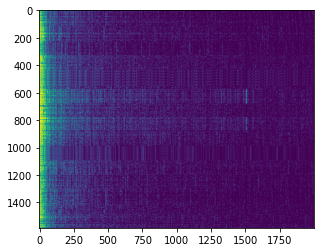

In [ ]:
plt.imshow(bag_of_words)

In [ ]:
categories = sorted(list(categories))
cate2idx   = dict((cate, idx) for idx, cate in enumerate(categories))

label = np.array([cate2idx[data["category"]] for data in dataset])

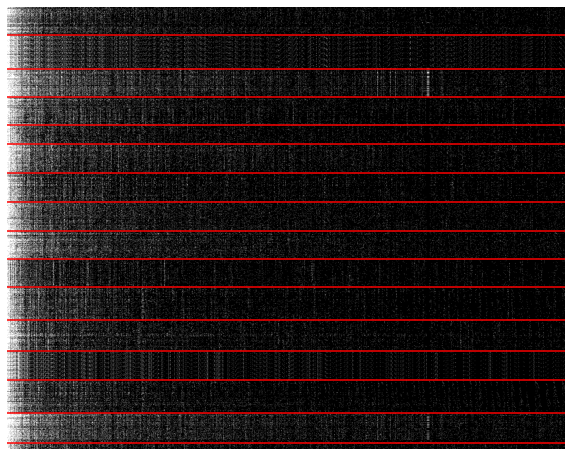

In [ ]:
n_label = len(cate2idx)
img     = np.zeros(shape=bag_of_words.shape)
ids     = [0]
for i in range(n_label):
    temp = bag_of_words[label == i]

    id = ids[-1]
    img[id : id + temp.shape[0], :] = temp
    ids.append(id + temp.shape[0])

plt.figure(figsize=(10, 10))
plt.imshow(img, cmap="gray")
for id in ids[1:-1]:
    plt.plot((0, img.shape[1] - 1), (id, id), color="r")

plt.axis("off");

## Train test split

In [ ]:
split_size = 0.8
random.seed(1)

train_ids = []
test_ids  = []
for i in range(len(cate2idx)):
    index_of_label_i = list(np.where(label == i)[0])
    index_of_label_i = random.sample(index_of_label_i, len(index_of_label_i))

    # print(index_of_label_i[:2])
    train_num = int(split_size * len(index_of_label_i))
    train_ids.extend(index_of_label_i[:train_num])
    test_ids.extend(index_of_label_i[train_num:])

print(len(train_ids), len(test_ids))

1262 323


In [ ]:
x_train = bag_of_words[train_ids]
y_train = label[train_ids].reshape((-1, 1))
x_test = bag_of_words[test_ids]
y_test = label[test_ids].reshape((-1, 1))

print(x_train.shape, y_train.shape)

(1262, 2000) (1262, 1)


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation="relu", input_shape=(n_feats, )),
    tf.keras.layers.Dense(n_label, activation="softmax"),
]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
20/20 [==============================] - 1s 19ms/step - loss: 2.3370 - accuracy: 0.2819 - val_loss: 1.4283 - val_accuracy: 0.5542
Epoch 2/30
20/20 [==============================] - 0s 12ms/step - loss: 0.8429 - accuracy: 0.7572 - val_loss: 1.3072 - val_accuracy: 0.5882
Epoch 3/30
20/20 [==============================] - 0s 12ms/step - loss: 0.4718 - accuracy: 0.8473 - val_loss: 1.4653 - val_accuracy: 0.5387
Epoch 4/30
20/20 [==============================] - 0s 11ms/step - loss: 0.3869 - accuracy: 0.8606 - val_loss: 1.4546 - val_accuracy: 0.5851
Epoch 5/30
20/20 [==============================] - 0s 12ms/step - loss: 0.3755 - accuracy: 0.8602 - val_loss: 1.5030 - val_accuracy: 0.5418
Epoch 6/30
20/20 [==============================] - 0s 12ms/step - loss: 0.3510 - accuracy: 0.8716 - val_loss: 1.4526 - val_accuracy: 0.5635
Epoch 7/30
20/20 [==============================] - 0s 12ms/step - loss: 0.3107 - accuracy: 0.8808 - val_loss: 1.5358 - val_accuracy: 0.5387
Epoch 8/30
20

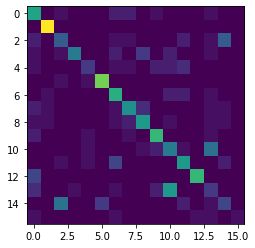

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)
plt.imshow(confusion_matrix(y_test, y_pred));

# Word Embedding

In [ ]:
import os

In [ ]:
!rm -r news

In [ ]:
idx2cate = dict([(idx, cate) for cate, idx in cate2idx.items()])

In [ ]:
os.mkdir("news")

for cate in cate2idx:
    path = f"news/{cate}"
    os.mkdir(path)

for i in range(len(data_tokenized)):
    data = data_tokenized[i]
    lbl  = labels[i]

    cate = idx2cate[lbl]
    path = f"news/{cate}/{i}.txt"

    with open(path, "w") as f:
        for token in data:
            f.write(token + "\n")

In [ ]:
all_tokens = [token for data in data_tokenized for token in data]

In [ ]:
word_counts = Counter(all_tokens)

In [ ]:
n_feats  = 20000
maxlen = 512
embedding_dim = 128
num_categories= len(cate2idx)

In [ ]:
word2idx = {"<pad>" : 0, "<start>" : 1, "<end>" : 2, "<unk>" : 3}

idx = 4
for word, count in word_counts.most_common(n_feats):
    word2idx[word] = idx
    idx += 1

In [ ]:
data_indexed = []

for data in data_tokenized:
    text = [1]
    for token in data:
        if len(text) == maxlen - 1:
            break
        text.append(word2idx.get(token, 3))
    
    text.append(2)
    while len(text) < maxlen:
        text.append(0)
    data_indexed.append(text)

In [ ]:
from tensorflow.keras import layers

# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(None,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = layers.Embedding(len(word2idx), embedding_dim)(inputs)
x = layers.Dropout(0.5)(x)

# Conv1D + global max pooling
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense(num_categories - 1, activation="softmax", name="predictions")(x)

model = tf.keras.Model(inputs, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
x = np.array(data_indexed)
y = np.array(label).reshape((-1, 1))

x = x[y.ravel() != 15]
y = y[y.ravel() != 15]

random_ids = random.sample(range(x.shape[0]), x.shape[0])

x = x[random_ids]
y = y[random_ids]

In [ ]:
x.shape, y.shape

((1562, 512), (1562, 1))

In [ ]:
model.fit(x, y, batch_size=32, epochs=50, validation_split=0.2, shuffle=True)

Epoch 1/50
40/40 [==============================] - 7s 165ms/step - loss: 2.7116 - accuracy: 0.0650 - val_loss: 2.7016 - val_accuracy: 0.1022
Epoch 2/50
40/40 [==============================] - 6s 159ms/step - loss: 2.6979 - accuracy: 0.0773 - val_loss: 2.6685 - val_accuracy: 0.0895
Epoch 3/50
40/40 [==============================] - 6s 159ms/step - loss: 2.6575 - accuracy: 0.1054 - val_loss: 2.6151 - val_accuracy: 0.1629
Epoch 4/50
40/40 [==============================] - 6s 159ms/step - loss: 2.5658 - accuracy: 0.1476 - val_loss: 2.4745 - val_accuracy: 0.2141
Epoch 5/50
40/40 [==============================] - 6s 158ms/step - loss: 2.3550 - accuracy: 0.1904 - val_loss: 2.2005 - val_accuracy: 0.2524
Epoch 6/50
40/40 [==============================] - 6s 160ms/step - loss: 2.0665 - accuracy: 0.2909 - val_loss: 1.9598 - val_accuracy: 0.3419
Epoch 7/50
40/40 [==============================] - 6s 160ms/step - loss: 1.7257 - accuracy: 0.3846 - val_loss: 1.8422 - val_accuracy: 0.3227
Epoch 

### Large data

In [ ]:
dataset = []
with open("news_large.jsonl", encoding="utf-8") as f:
    for line in f:
        data = json.loads(line)
        dataset.append(data)

In [ ]:
num_articles = {}
for c in categories:
    num_articles[c] = 0

for data in dataset:
    num_articles[data["category"]] += 1

In [ ]:
num_articles

{'Bạn đọc': 802,
 'Công nghệ': 820,
 'Du lịch': 803,
 'Giáo dục': 802,
 'Giả-thật': 803,
 'Giải trí': 803,
 'Khoa học': 805,
 'Kinh doanh': 811,
 'Nhịp sống trẻ': 805,
 'Pháp luật': 801,
 'Sức khỏe': 809,
 'Thế giới': 808,
 'Thể thao': 810,
 'Thời sự': 817,
 'Văn hóa': 803,
 'Xe': 766}

In [ ]:
data_tokenized = []
for data in dataset:
    text = " ".join(data["content"])
    tokens = word_tokenize(text)
    data_tokenized.append([standardization(token) for token in tokens if filtering(token)])

In [ ]:
labels = np.array([cate2idx[data["category"]] for data in dataset])

In [ ]:
data_tokenized = []
labels = []
categories = sorted(os.listdir("news/"))
for i, cate in enumerate(categories):
    for fn in os.listdir("news/" + cate + "/"):
        path = "news/" + cate + "/" + fn
        data = []
        with open(path) as f:
            for line in f:
                data.append(line.replace("\n", ""))
        data_tokenized.append(data)
        labels.append(i)

cate2idx = dict([(cate, idx) for idx, cate in enumerate(categories)])

In [ ]:
all_tokens = [token for data in data_tokenized for token in data]
word_counts = Counter(all_tokens)

n_feats  = 20000
maxlen = 1024
embedding_dim = 128
num_categories= len(cate2idx)

word2idx = {"<pad>" : 0, "<start>" : 1, "<end>" : 2, "<unk>" : 3}

idx = 4
for word, count in word_counts.most_common(n_feats):
    word2idx[word] = idx
    idx += 1

data_indexed = []

for data in data_tokenized:
    text = [1]
    for token in data:
        if len(text) == maxlen - 1:
            break
        text.append(word2idx.get(token, 3))
    
    text.append(2)
    while len(text) < maxlen:
        text.append(0)
    data_indexed.append(text)

x_train = np.array(data_indexed)
y_train = np.array(labels).reshape((-1, 1))

random_ids = random.sample(range(x_train.shape[0]), x_train.shape[0])

x_train = x_train[random_ids]
y_train = y_train[random_ids]

In [ ]:
x_train.shape, y_train.shape

((12868, 1024), (12868, 1))

### Using 1D convolution for text classification

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(None,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = layers.Embedding(len(word2idx), embedding_dim)(inputs)
x = layers.Dropout(0.5)(x)

# Conv1D + global max pooling
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.BatchNormalization()(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.BatchNormalization()(x)

x = layers.GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense(num_categories, activation="softmax", name="predictions")(x)

model = tf.keras.Model(inputs, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_22 (Embedding)     (None, None, 128)         2560512   
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
conv1d_76 (Conv1D)           (None, None, 128)         114816    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 128)         512       
_________________________________________________________________
conv1d_77 (Conv1D)           (None, None, 128)         114816    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 128)         512 

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
322/322 [==============================] - 15s 44ms/step - loss: 3.1734 - accuracy: 0.0866 - val_loss: 2.6259 - val_accuracy: 0.1787
Epoch 2/20
322/322 [==============================] - 14s 42ms/step - loss: 2.2968 - accuracy: 0.2156 - val_loss: 2.0034 - val_accuracy: 0.2894
Epoch 3/20
322/322 [==============================] - 14s 44ms/step - loss: 1.9104 - accuracy: 0.3243 - val_loss: 1.7203 - val_accuracy: 0.4351
Epoch 4/20
322/322 [==============================] - 14s 42ms/step - loss: 1.5243 - accuracy: 0.4717 - val_loss: 1.2673 - val_accuracy: 0.5812
Epoch 5/20
322/322 [==============================] - 14s 43ms/step - loss: 1.1131 - accuracy: 0.6297 - val_loss: 1.3181 - val_accuracy: 0.6002
Epoch 6/20
322/322 [==============================] - 14s 42ms/step - loss: 0.9242 - accuracy: 0.6919 - val_loss: 1.2397 - val_accuracy: 0.6224
Epoch 7/20
322/322 [==============================] - 14s 43ms/step - loss: 0.7493 - accuracy: 0.7476 - val_loss: 1.3294 - val_accuracy:

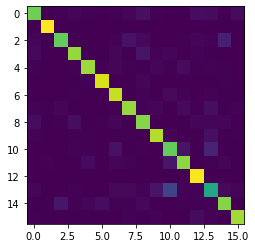

In [ ]:
pred = np.argmax(model.predict(x_train), axis=-1).ravel() 
truth= y_train.ravel()
plt.imshow(confusion_matrix(truth, pred))
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    layers.Embedding(len(word2idx), embedding_dim, input_shape=(1024, )),

    layers.Conv1D(32, 7, padding="same", activation="relu", strides=2),
    layers.MaxPool1D(2, 2),

    layers.Conv1D(64, 7, padding="same", activation="relu", strides=2),
    layers.MaxPool1D(2, 2),

    layers.Conv1D(128, 7, padding="same", activation="relu", strides=2),
    layers.MaxPool1D(2, 2),

    layers.Conv1D(256, 7, padding="same", activation="relu", strides=2),
    layers.MaxPool1D(2, 2),

    layers.Conv1D(256, 7, padding="same", activation="relu", strides=2),
    layers.MaxPool1D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(num_categories, activation="softmax")
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 1024, 128)         2560512   
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 512, 32)           28704     
_________________________________________________________________
max_pooling1d_55 (MaxPooling (None, 256, 32)           0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 128, 64)           14400     
_________________________________________________________________
max_pooling1d_56 (MaxPooling (None, 64, 64)            0         
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 32, 128)           57472     
_________________________________________________________________
max_pooling1d_57 (MaxPooling (None, 16, 128)         

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
322/322 [==============================] - 14s 41ms/step - loss: 2.4369 - accuracy: 0.1592 - val_loss: 1.8295 - val_accuracy: 0.3434
Epoch 2/20
322/322 [==============================] - 13s 41ms/step - loss: 1.5734 - accuracy: 0.4277 - val_loss: 1.4339 - val_accuracy: 0.5214
Epoch 3/20
322/322 [==============================] - 13s 40ms/step - loss: 1.0284 - accuracy: 0.6487 - val_loss: 1.3648 - val_accuracy: 0.5952
Epoch 4/20
322/322 [==============================] - 13s 39ms/step - loss: 0.7073 - accuracy: 0.7690 - val_loss: 1.3440 - val_accuracy: 0.6037
Epoch 5/20
322/322 [==============================] - 13s 39ms/step - loss: 0.5333 - accuracy: 0.8322 - val_loss: 1.3646 - val_accuracy: 0.6045
Epoch 6/20
322/322 [==============================] - 13s 41ms/step - loss: 0.4525 - accuracy: 0.8544 - val_loss: 1.4749 - val_accuracy: 0.6010
Epoch 7/20
322/322 [==============================] - 13s 40ms/step - loss: 0.3984 - accuracy: 0.8738 - val_loss: 1.6307 - val_accuracy:

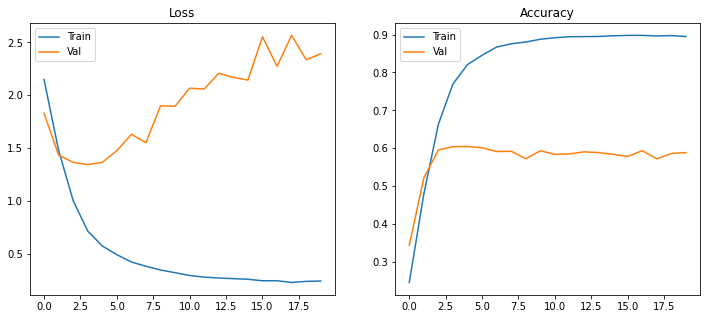

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.title("Accuracy")
plt.legend();

## Using LSTM

In [ ]:
model = tf.keras.models.Sequential([
    layers.Embedding(len(word2idx), embedding_dim, input_shape=(1024, )),

    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(64)),

    layers.Dense(512, activation="relu"),
    layers.Dense(num_categories, activation="softmax")
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 1024, 128)         2560512   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 1024, 128)         98816     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_35 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_36 (Dense)             (None, 16)                8208      
Total params: 2,832,400
Trainable params: 2,832,400
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
322/322 [==============================] - 57s 163ms/step - loss: 2.3467 - accuracy: 0.2158 - val_loss: 1.5833 - val_accuracy: 0.4697
Epoch 2/5
322/322 [==============================] - 52s 161ms/step - loss: 1.2907 - accuracy: 0.5610 - val_loss: 1.2920 - val_accuracy: 0.5866
Epoch 3/5
322/322 [==============================] - 51s 160ms/step - loss: 0.8478 - accuracy: 0.7247 - val_loss: 1.3804 - val_accuracy: 0.5618
Epoch 4/5
322/322 [==============================] - 51s 160ms/step - loss: 0.6532 - accuracy: 0.7952 - val_loss: 1.4212 - val_accuracy: 0.5785
Epoch 5/5
322/322 [==============================] - 52s 160ms/step - loss: 0.5044 - accuracy: 0.8451 - val_loss: 1.5407 - val_accuracy: 0.5672
